<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
سیگنال‌ها و سیستم‌ها - جناب آقای دکتر منظوری شلمانی
            </font>
			<br />
			<br />
زمستان ۱۳۹۹
		</div>
		<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
تمرین اول
            	<br/>
			</font>
نام و نام خانوادگی: امیرمهدی نامجو
			<br/><br/>
شماره دانشجویی: 97107212
                <br/>
        </style>
	</font>
</div>

# Q8

ابتدا توابع گسسته-زمان را پیاده‌سازی می‌کنیم.

In [23]:
def unit_impulse_discrete(n , right_shift = 0):
    if n-right_shift == 0:
        return 1
    return 0

def unit_step_discrete(n , right_shift = 0):
    if n- right_shift >=0:
        return 1
    return 0

def unit_ramp_discrete(n , right_shift = 0):
    if n - right_shift >=0:
        return n-right_shift
    return 0

در بالا در اصل توابع $\delta(n+right\_shift)$ و $u(n+right\_shift)$ و $ramp(n+right\_shift)$ را پیاده‌سازی کرده‌ایم. n متغیر اصلی است و right_shift هم بیانگر مقدار شیفت به راست است که ممکن است نیاز بشود ولی در صورت عدم استفاده صفر در نظر گرفته شده است. در زیر تست این توابع با شیفت یک واحد به راست را مشاهده می‌کنید.

In [24]:
test_data = list(range(-10,10 , 1))

uid = list(map(lambda x: unit_impulse_discrete(x,1) , test_data))
usd = list(map(lambda x: unit_step_discrete(x,1) , test_data))
urd = list(map(lambda x: unit_ramp_discrete(x,1) , test_data))

print(test_data)
print(uid)
print(usd)
print(urd)


[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8]


پیاده‌سازی نسخه پیوسته برای پله و رمپ شبیه حالت گسسته است. برای ضربه واحد، یک حد فاصل خیلی کوچک در حد $10^{-6}$ در نظر میگیریم که در اصل این همان دلتای کوچکی است که در تعریف استفاده می‌شود. در بازه بین $-10^{-6}$ تا $10^{-6}$ مقدار $5 \times 10^{5}$ را به تابع اختصاص می‌دهیم. در خارج این بازه تابع صفر است. به این شکل شرط مربوط به مساحت هم تا حد خوبی تامین می‌شود. 

In [98]:
def unit_impulse_cont(n , right_shift = 0):
    x = n - right_shift
    TOLERANCE = 1e-6
    LARGE_VALUE = 1/(2*TOLERANCE)
    if x <= TOLERANCE and x>= -TOLERANCE:
        return LARGE_VALUE
    return 0


def unit_step_cont(n , right_shift = 0):
    if n- right_shift >=0:
        return 1
    return 0

def unit_ramp_cont(n , right_shift = 0):
    if n - right_shift >=0:
        return n-right_shift
    return 0

مشابه قسمت قبل تستی هم روی توابع انجام می‌دهیم

In [107]:
test_data_2 = list(map(lambda x: x/10 , list(range(-10,11 , 1))))

uic = list(map(lambda x: unit_impulse_cont(x,0) , test_data))
usc = list(map(lambda x: unit_step_cont(x,0) , test_data))
urc = list(map(lambda x: unit_ramp_cont(x,0) , test_data))


print(test_data_2)
print(uic)
print(usc)
print(urc)


[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500000.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Q9

## A

ابتدا تابع گفته شده را پیاده‌سازی می‌کنیم.

In [106]:
def func(t):
    if t == -2:
        return -1
    elif t>-2 and t<= -1:
        return t+1
    elif t>-1 and t<=0:
        return 1
    elif t>0 and t<=1:
        return 2
    elif t>1 and t<=2:
        return 2-t
    else:
        raise ValueError("Invalid Argument")
        

حال تابع را رسم می‌کنیم. ابتدا یک تابع کمکی برای رسم ایجاد کرده‌ایم که صرفا داده‌ها و عنوان هر محور را ورودی گرفته و به شکل تمیز آن را رسم کند. سپس از آن استفاده کرده‌ایم.

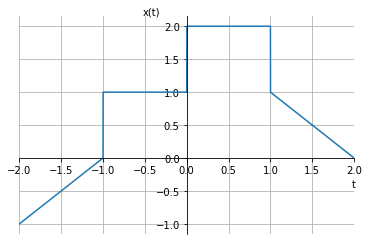

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def plotter(x , y , x_label = "t" , y_label = "x(t)"):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_ylabel(y_label,y=1 , rotation=0)
    ax.set_xlabel(x_label,x=1)
    
    ax.set_xlim(np.min(x) , np.max(x))

    plt.plot(x , y)

    plt.show()

COUNT = 1000000
t_data = np.linspace(-2,2,COUNT , dtype = np.float64)
x_data = np.fromiter((func(i) for i in t_data), t_data.dtype)

plotter(t_data , x_data)






## B

توابع هر قسمت را ابتدا با نام‌های f1,f2,f3,f4 به کمک lambda و تابع‌های از پیش تعریف شده، تعریف کرده و سپس رسم می‌کنیم.

In [104]:
f1 = lambda t: func(2-t)
f2 = lambda t: func(4-t/2)
f3 = lambda t: (func(t) + func(-t))*unit_step_cont(t)
f4 = lambda t: func(t)* (unit_impulse_cont(t ,-3/2) - unit_impulse_cont(t ,3/2))

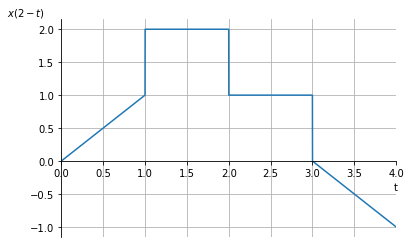

In [103]:
#1
COUNT = 1000000
t_data = np.linspace(0,4,COUNT , dtype = np.float64)
x_data = np.fromiter((f1(i) for i in t_data), t_data.dtype)

plotter(t_data , x_data , y_label = r"$x(2-t)$")

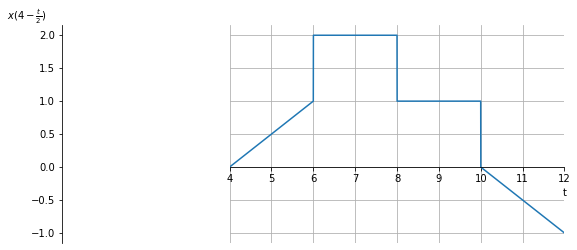

In [102]:
#2
COUNT = 1000000
t_data = np.linspace(4,12,COUNT , dtype = np.float64)
x_data = np.fromiter((f2(i) for i in t_data), t_data.dtype)

plotter(t_data , x_data , y_label = r"$x(4-\frac{t}{2})$")

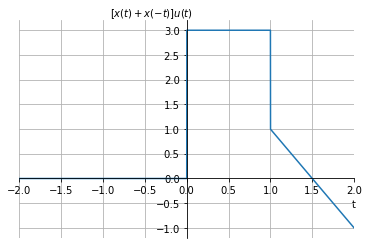

In [108]:
#3
COUNT = 1000000
t_data = np.linspace(-2,2,COUNT , dtype = np.float64)
x_data = np.fromiter((f3(i) for i in t_data), t_data.dtype)

plotter(t_data , x_data , y_label = r"$\left[x(t) + x(-t)\right] u(t)$")

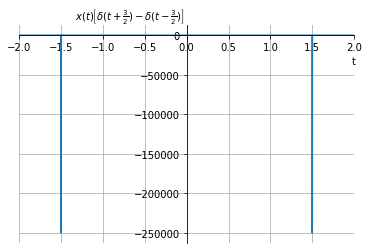

In [109]:
#3
COUNT = 1000000
t_data = np.linspace(-2,2,COUNT , dtype = np.float64)
x_data = np.fromiter((f4(i) for i in t_data), t_data.dtype)


plotter(t_data , x_data , y_label = r"$x(t)\left[ \delta(t + \frac{3}{2}) - \delta(t - \frac{3}{2}) \right]$")